In [1]:
import pandas as pd
import numpy as np
import json
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from cdispyutils.hmac4 import get_auth

auth = ''

def add_keys(filename):
    ''' Get auth from our secret keys '''
    global auth 
    with open(filename,'r') as f:
        secrets = json.load(f)
    auth = get_auth(secrets['access key'], secrets['secret key'], 'submission')

add_keys("/home/ubuntu/cred.json")


def query_api(query_txt):
    ''' Request results for a specific query '''
    query = {'query': query_txt}
    output = requests.post('http://kubenode.internal.io:30006/v0/submission/graphql/', auth=auth, json=query).text
    data = json.loads(output) 
    if 'data' not in data and 'errors' in data:
        print query    
    return data


#get ctc_ml based


df = pd.DataFrame(columns=('patient_id','tube_id','ml','ml_type','study_id', 'tta'))

di = 0


In [3]:

query = """ {  study(first: 0, project_id: "bpa-USC_OPT1_T1", order_by_asc: "submitter_id",    submitter_id:"BPA-USC-BC-EX1") {   study_id: submitter_id,   cases(first: 0,order_by_asc:"submitter_id") {     patient_id: submitter_id  ,    biospecimens(first: 0) {       samples(first: 0) {   tta: hours_to_fractionation_upper,      tube_id: submitter_id     ,    aliquots(first: 1, order_by_asc:"submitter_id")  {                       slide_id: submitter_id     ,       analytes(first: 0, analyte_type:"Cell Count", quick_search:"ctc_concentration") {       aid: submitter_id,                     quantification_assays(quick_search: "ctc_concentration",                 not: {molecular_concentration: -1}) {        qa_id: submitter_id,        molecular_concentration                              }            }          }        }      }   }  }} """
data = query_api(query)
data = data["data"]

#####gets the ctc/mL data

for s in range(len(data["study"])):
    study = data["study"][s]["study_id"]
    for c in range(len(data["study"][s]["cases"])):
        pid = data["study"][s]["cases"][c]["patient_id"]
        for b in range(len(data["study"][s]["cases"][c]["biospecimens"])):
            for sa in range(len(data["study"][s]["cases"][c]["biospecimens"][b]["samples"])):
                tid = data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["tube_id"]
                tta = data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["tta"]
                for al in range(len(data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["aliquots"])):
                    sid = data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["aliquots"][al]["slide_id"]
                    if len(data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["aliquots"][al]["analytes"]) == 0:
                        continue
                    for an in range(len(data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["aliquots"][al]["analytes"])):
                        if len(data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["aliquots"][al]["analytes"][an]["quantification_assays"]) == 0:
                            continue
                        ml_type = "ctc_ml"#data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["aliquots"][al]["analytes"][an]["aid"]
                        ml = data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["aliquots"][al]["analytes"][an]["quantification_assays"][0]["molecular_concentration"]
                        df.loc[di] = [pid,tid,ml,ml_type,study,tta]
                        di = di + 1


In [4]:

#####gets the Low_ctc/mL data
query = """ {  study(first: 0, project_id: "bpa-USC_OPT1_T1", order_by_asc: "submitter_id",    submitter_id:"BPA-USC-BC-EX1") {   study_id: submitter_id,   cases(first: 0,order_by_asc:"submitter_id") {     patient_id: submitter_id  ,    biospecimens(first: 0) {       samples(first: 0) {   tta: hours_to_fractionation_upper,      tube_id: submitter_id     ,    aliquots(first: 1, order_by_asc:"submitter_id")  {                       slide_id: submitter_id     ,       analytes(first: 0, analyte_type:"Cell Count", quick_search:"ctc_low_concentration") {       aid: submitter_id,                     quantification_assays(quick_search: "ctc_low_concentration",                 not: {molecular_concentration: -1}) {        qa_id: submitter_id,        molecular_concentration                              }            }          }        }      }   }  }} """
data = query_api(query)
data = data["data"]

for s in range(len(data["study"])):
    study = data["study"][s]["study_id"]
    for c in range(len(data["study"][s]["cases"])):
        pid = data["study"][s]["cases"][c]["patient_id"]
        for b in range(len(data["study"][s]["cases"][c]["biospecimens"])):
            for sa in range(len(data["study"][s]["cases"][c]["biospecimens"][b]["samples"])):
                tid = data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["tube_id"]
                tta = data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["tta"]
                for al in range(len(data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["aliquots"])):
                    sid = data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["aliquots"][al]["slide_id"]
                    if len(data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["aliquots"][al]["analytes"]) == 0:
                        continue
                    for an in range(len(data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["aliquots"][al]["analytes"])):
                        if len(data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["aliquots"][al]["analytes"][an]["quantification_assays"]) == 0:
                            continue
                        ml_type = "ctc_low_ml"#data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["aliquots"][al]["analytes"][an]["aid"]
                        ml = data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["aliquots"][al]["analytes"][an]["quantification_assays"][0]["molecular_concentration"]
                        df.loc[di] = [pid,tid,ml,ml_type,study,tta]
                        di = di + 1


In [5]:


#####gets the Small_ctc/mL data
query = """ {  study(first: 0, project_id: "bpa-USC_OPT1_T1", order_by_asc: "submitter_id",    submitter_id:"BPA-USC-BC-EX1") {   study_id: submitter_id,   cases(first: 0,order_by_asc:"submitter_id") {     patient_id: submitter_id  ,    biospecimens(first: 0) {       samples(first: 0) {   tta: hours_to_fractionation_upper,      tube_id: submitter_id     ,    aliquots(first: 1, order_by_asc:"submitter_id")  {                       slide_id: submitter_id     ,       analytes(first: 0, analyte_type:"Cell Count", quick_search:"ctc_small_concentration") {       aid: submitter_id,                     quantification_assays(quick_search: "ctc_small_concentration",                 not: {molecular_concentration: -1}) {        qa_id: submitter_id,        molecular_concentration                              }            }          }        }      }   }  }} """
data = query_api(query)
data = data["data"]

for s in range(len(data["study"])):
    study = data["study"][s]["study_id"]
    for c in range(len(data["study"][s]["cases"])):
        pid = data["study"][s]["cases"][c]["patient_id"]
        for b in range(len(data["study"][s]["cases"][c]["biospecimens"])):
            for sa in range(len(data["study"][s]["cases"][c]["biospecimens"][b]["samples"])):
                tid = data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["tube_id"]
                tta = data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["tta"]
                for al in range(len(data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["aliquots"])):
                    sid = data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["aliquots"][al]["slide_id"]
                    if len(data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["aliquots"][al]["analytes"]) == 0:
                        continue
                    for an in range(len(data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["aliquots"][al]["analytes"])):
                        if len(data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["aliquots"][al]["analytes"][an]["quantification_assays"]) == 0:
                            continue
                        ml_type = "ctc_small_ml"#data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["aliquots"][al]["analytes"][an]["aid"]
                        ml = data["study"][s]["cases"][c]["biospecimens"][b]["samples"][sa]["aliquots"][al]["analytes"][an]["quantification_assays"][0]["molecular_concentration"]
                        df.loc[di] = [pid,tid,ml,ml_type,study,tta]
                        di = di + 1


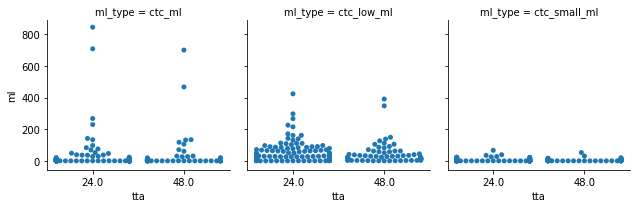

In [6]:



#plt.switch_backend('agg')
plt.figure(figsize=(8,25))
g = sns.FacetGrid(df,col="ml_type")
pl = g.map(sns.swarmplot,"tta","ml")
#pl.savefig('ctc_ml_table.png')
plt.show()


/usr/local/lib/python2.7/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


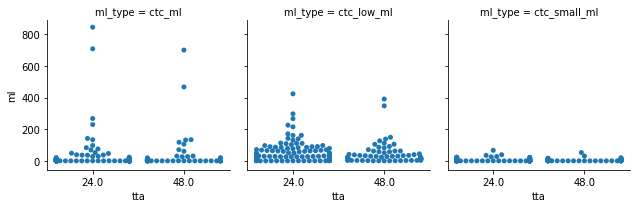

In [2]:


### this is running with jsonToDF which converts the data Object to a pandas DataFrame! 

##This way you don't have to worry about the unraveling from the examples above!
import jsonToDF as jtd

query = """ {  study(first: 0, project_id: "bpa-USC_OPT1_T1", order_by_asc: "submitter_id",    submitter_id:"BPA-USC-BC-EX1") {   study_id: submitter_id,   cases(first: 0,order_by_asc:"submitter_id") {     patient_id: submitter_id  ,    biospecimens(first: 0) {       samples(first: 0) {   tta: hours_to_fractionation_upper,      tube_id: submitter_id     ,    aliquots(first: 1, order_by_asc:"submitter_id")  {                       slide_id: submitter_id     ,       analytes(first: 0, analyte_type:"Cell Count", quick_search:"ctc_concentration") {       aid: submitter_id,                     quantification_assays(quick_search: "ctc_concentration",                 not: {molecular_concentration: -1}) {        qa_id: submitter_id,        molecular_concentration                              }            }          }        }      }   }  }} """
data = query_api(query)
data = data["data"]

jdata = jtd.jsonToDF(data)
for i in range(len(jdata.index)):
    ml_type = "ctc_ml"
    ml = jdata.iloc[i]["molecular_concentration"]
    pid = jdata.iloc[i]["patient_id"]
    tid = jdata.iloc[i]["tube_id"]
    study = jdata.iloc[i]["study_id"]
    tta = jdata.iloc[i]["tta"]
    if tta is None or np.isnan(ml):
        continue
    df.loc[di] = [pid,tid,ml,ml_type,study,tta]
    di = di + 1


#####gets the Low_ctc/mL data
query = """ {  study(first: 0, project_id: "bpa-USC_OPT1_T1", order_by_asc: "submitter_id",    submitter_id:"BPA-USC-BC-EX1") {   study_id: submitter_id,   cases(first: 0,order_by_asc:"submitter_id") {     patient_id: submitter_id  ,    biospecimens(first: 0) {       samples(first: 0) {   tta: hours_to_fractionation_upper,      tube_id: submitter_id     ,    aliquots(first: 1, order_by_asc:"submitter_id")  {                       slide_id: submitter_id     ,       analytes(first: 0, analyte_type:"Cell Count", quick_search:"ctc_low_concentration") {       aid: submitter_id,                     quantification_assays(quick_search: "ctc_low_concentration",                 not: {molecular_concentration: -1}) {        qa_id: submitter_id,        molecular_concentration                              }            }          }        }      }   }  }} """
data = query_api(query)
data = data["data"]

jdata = jtd.jsonToDF(data)
for i in range(len(jdata.index)):
    ml_type = "ctc_low_ml"
    ml = jdata.iloc[i]["molecular_concentration"]
    pid = jdata.iloc[i]["patient_id"]
    tid = jdata.iloc[i]["tube_id"]
    study = jdata.iloc[i]["study_id"]
    tta = jdata.iloc[i]["tta"]
    if tta is None or np.isnan(ml):
        continue
    df.loc[di] = [pid,tid,ml,ml_type,study,tta]
    di = di + 1


#####gets the Small_ctc/mL data
query = """ {  study(first: 0, project_id: "bpa-USC_OPT1_T1", order_by_asc: "submitter_id",    submitter_id:"BPA-USC-BC-EX1") {   study_id: submitter_id,   cases(first: 0,order_by_asc:"submitter_id") {     patient_id: submitter_id  ,    biospecimens(first: 0) {       samples(first: 0) {   tta: hours_to_fractionation_upper,      tube_id: submitter_id     ,    aliquots(first: 1, order_by_asc:"submitter_id")  {                       slide_id: submitter_id     ,       analytes(first: 0, analyte_type:"Cell Count", quick_search:"ctc_small_concentration") {       aid: submitter_id,                     quantification_assays(quick_search: "ctc_small_concentration",                 not: {molecular_concentration: -1}) {        qa_id: submitter_id,        molecular_concentration                              }            }          }        }      }   }  }} """
data = query_api(query)
data = data["data"]

jdata = jtd.jsonToDF(data)
for i in range(len(jdata.index)):
    ml_type = "ctc_small_ml"
    ml = jdata.iloc[i]["molecular_concentration"]
    pid = jdata.iloc[i]["patient_id"]
    tid = jdata.iloc[i]["tube_id"]
    study = jdata.iloc[i]["study_id"]
    tta = jdata.iloc[i]["tta"]
    if tta is None or np.isnan(ml):
        continue
    df.loc[di] = [pid,tid,ml,ml_type,study,tta]
    di = di + 1


#plt.switch_backend('agg')
plt.figure(figsize=(8,25))
g = sns.FacetGrid(df,col="ml_type")
pl = g.map(sns.swarmplot,"tta","ml")
#pl.savefig('ctc_ml_table.png')
plt.show()